# Test beamforming for the high-Q gliders

In [12]:
# Imports

from os.path import join
from matplotlib.pyplot import subplots
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator, SecondLocator
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
from pandas import Timestamp, Timedelta
from numpy import log10, sqrt
from obspy.core.util import AttribDict

from utils_basic import GEO_STATIONS_A as stations_a, GEO_STATIONS_B as stations_b, INNER_STATIONS_A as inner_stations_a, INNER_STATIONS_B as inner_stations_b, ROOTDIR_GEO as rootdir
from utils_basic import get_geophone_locs, time2filename
from utils_plot import plot_beam_images, save_figure
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_array import get_beam_images, set_station_coords

In [13]:
# Inputs
## Data
starttime = "2020-01-13T20:01:01.5Z"
dur = 10.0 # seconds
subarray = "A"
station_selection = "inner"

## Preprocessing
freqmin = 40.0
freqmax = 75.0

## Plotting
xdim = 6.0
ydim = 2.0

ylim_wf = (-50.0, 50.0)

dbmin = -50.0
dbmax = 0.0

ylim_freq = (0.0, 200.0)

linewidth_wf = 0.1

In [14]:
# Read the station coordinates
stacoords = get_geophone_locs()

In [15]:
# Read and preprocess the data
if subarray == "A":
    if station_selection == "inner":
        stations = inner_stations_a
    else:
        stations = stations_a
elif subarray == "B":
    if station_selection == "inner":
        stations = inner_stations_b
    else:
        stations = stations_b
else:
    raise ValueError("Invalid subarray")

stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=stations, freqmin=freqmin, freqmax=freqmax)

Beamforming 1 component...
Beamforming Z component...
Beamforming 2 component...


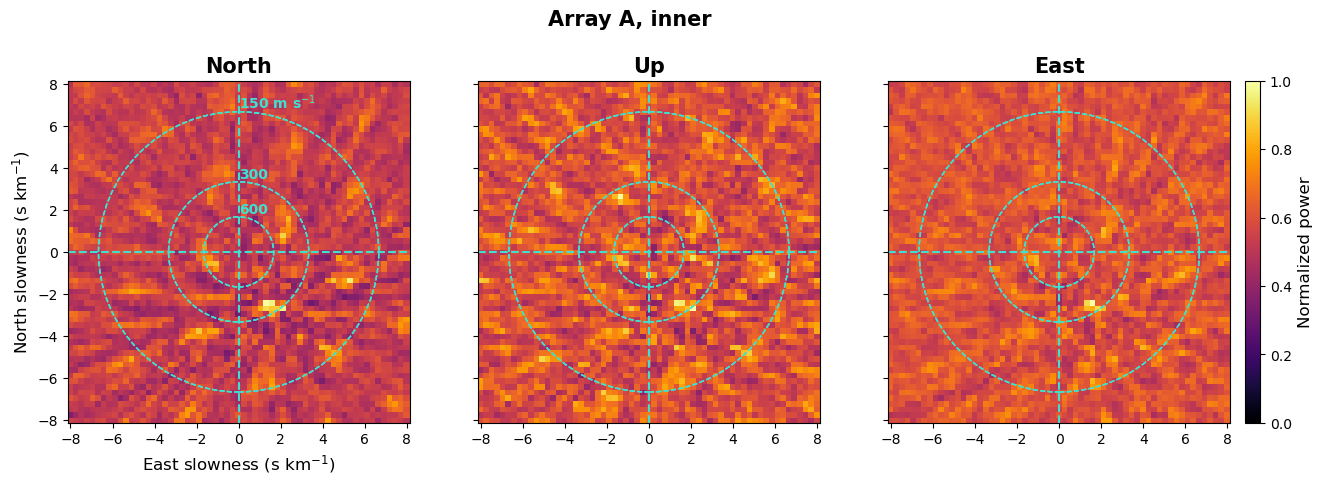

In [16]:
# Perform beamforming and plot
## Set the station coordinates
stream = set_station_coords(stream, stacoords)

## Beamforming
xslow, yslow, beamdict = get_beam_images(stream)

## Plot the beamforming results
fig, axes = plot_beam_images(xslow, yslow, beamdict, subarray=subarray, station_selection=station_selection)

In [17]:
# Save the figure
timestr = time2filename(starttime)
figname = f"beam_images_{timestr}_{subarray.lower()}_{station_selection}.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/beam_images_20200113T200101_a_inner.png
